In [8]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# Data preparation

In [10]:
pokemon = pd.read_csv('pokemon.csv', encoding='windows-1252')
combats = pd.read_csv('combats.csv')
pokemon.loc[pokemon['Type 2'].isnull(),'Type 2'] = pokemon[pokemon['Type 2'].isnull()]['Type 1']
dummy1 = pd.get_dummies(pokemon.loc[:,'Type 1'])
dummy2 = pd.get_dummies(pokemon.loc[:,'Type 2'])
del pokemon['Generation']
del pokemon['Legendary']

## Feature importance

In [12]:
row = []
trainX = []
trainY = []
typedict = {"Bug":1, "Dark":2, "Dragon":3, "Electric":4, "Fairy":5, "Fighting":6, 
            "Fire":7, "Flying":8, "Ghost":9, "Grass":10, "Ground":11, "Ice":12, 
            "Normal":13, "Poison":14, "Psychic":15, "Rock":16, "Steel":17, "Water":18}
legend = {"True":1, "False":0}
for idx, c in combats.iterrows():
    p1t2 = 0;
    p2t2 = 0;
    row = [pokemon["HP"][c[0]-1] - pokemon["HP"][c[1]-1], 
           pokemon["Attack"][c[0]-1] - pokemon["Attack"][c[1]-1], 
           pokemon["Defense"][c[0]-1] - pokemon["Defense"][c[1]-1], 
           pokemon["Sp. Atk"][c[0]-1] - pokemon["Sp. Atk"][c[1]-1], 
           pokemon["Sp. Def"][c[0]-1] - pokemon["Sp. Def"][c[1]-1],
           pokemon["Speed"][c[0]-1] - pokemon["Speed"][c[1]-1]]
    if c[2] == c[0]:
        trainY.append(0)
    else:
        trainY.append(1)
    trainX.append(row)

print(len(trainX))
print(len(trainY))
print(trainX[5], trainY[5])

50000
50000
[-10, -3, -100, 7, -100, 5] 0


Feature ranking:
1. feature 5 (0.654536)
2. feature 1 (0.100890)
3. feature 3 (0.083220)
4. feature 0 (0.054999)
5. feature 4 (0.054512)
6. feature 2 (0.051842)

Labels: 
HP-0 Attack-1 Defence-2 Sp.Atk-3 Sp.Def-4 Speed-5


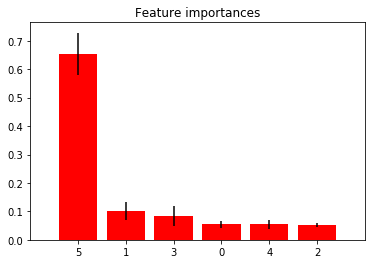

In [35]:
# use the sklearn Decision Tree Package and train the combats dataset as follow

from sklearn import tree
import matplotlib.pyplot as plt
import prettytable
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=500, random_state=0)
treeModel = clf.fit(trainX, trainY)

importances = treeModel.feature_importances_
std = np.std([tree.feature_importances_ for tree in treeModel.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(len(trainX[0])):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure()
#ax=plt.figure()
plt.title("Feature importances")
plt.bar(range(len(trainX[0])), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(trainX[0])), indices)
plt.xlim([-1, len(trainX[0])])
print("\nLabels: \nHP-0", "Attack-1", "Defence-2", "Sp.Atk-3", "Sp.Def-4", "Speed-5")
#ax.legend()
plt.show()

In [14]:
combats_array = np.array(combats)
for i in range(combats_array.shape[0]):
    for j in range(combats_array.shape[1]):
        if combats_array[i][2] == combats_array[i][0]:
            combats_array[i][2] = 0
        elif combats_array[i][2] == combats_array[i][1]:
             combats_array[i][2] = 1
combats = pd.DataFrame(data = combats_array, index = np.arange(1, 50001), columns = np.arange(1, 4))
label = combats[3]

## Type tranfermation factor

In [15]:
Type_table = np.zeros((18, 18))
Type_table[0,:] = [1,1,1,1,1,0.5,1,0,0.5,1,1,1,1,1,1,1,1,1]
Type_table[1,:] = [2,1,0.5,0.5,1,2,0.5,0,2,1,1,1,1,0.5,2,1,2,0.5]
Type_table[2,:] = [1,2,1,1,1,0.5,2,1,0.5,1,1,2,0.5,1,1,1,1,1]
Type_table[3,:] = [1,1,1,0.5,0.5,0.5,1,0.5,0,1,1,2,1,1,1,1,1,2]
Type_table[4,:] = [1,1,0,2,1,2,0.5,1,2,2,1,0.5,2,1,1,1,1,1]
Type_table[5,:] = [1,0.5,2,1,0.5,1,2,1,0.5,2,1,1,1,1,2,1,1,1]
Type_table[6,:] = [1,0.5,0.5,0.5,1,1,1,0.5,0.5,0.5,1,2,1,2,1,1,2,0.5]
Type_table[7,:] = [0,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,0.5,1]
Type_table[8,:] = [1,1,1,1,1,2,1,1,0.5,0.5,0.5,1,0.5,1,2,1,1,2]
Type_table[9,:] = [1,1,1,1,1,0.5,2,1,2,0.5,0.5,2,1,1,2,0.5,1,1]
Type_table[10,:] = [1,1,1,1,2,2,1,1,1,2,0.5,0.5,1,1,1,0.5,1,1]
Type_table[11,:] = [1,1,0.5,0.5,2,2,0.5,1,0.5,0.5,2,0.5,1,1,1,0.5,1,1]
Type_table[12,:] = [1,1,2,1,0,1,1,1,1,1,2,0.5,0.5,1,1,0.5,1,1]
Type_table[13,:] = [1,2,1,2,1,1,1,1,0.5,1,1,1,1,0.5,1,1,0,1]
Type_table[14,:] = [1,1,2,1,2,1,1,1,0.5,0.5,0.5,2,1,1,0.5,2,1,1]
Type_table[15,:] = [1,1,1,1,1,1,1,1,0.5,1,1,1,1,1,1,2,1,0]
Type_table[16,:] = [1,0.5,1,1,1,1,1,2,1,1,1,1,1,2,1,1,0.5,0.5]
Type_table[17,:] = [1,2,1,0.5,1,1,1,1,0.5,0.5,1,1,1,1,1,2,2,1]
Type_table = pd.DataFrame(Type_table)

## Feature rearrangement

In [16]:
def type_result(BA,Pokemon_table,Type1,Type2,index_1,index_2):
    pokemon_1_type1 = Type1.loc[index_1-1].values
    pokemon_1_type2 = Type2.loc[index_1-1].values
    pokemon_2_type1 = Type1.loc[index_2-1].values
    pokemon_2_type2 = Type2.loc[index_2-1].values
    
    Pokemon1 = Pokemon_table.loc[index_1-1]
    Pokemon2 = Pokemon_table.loc[index_2-1]
    
    
    
    pokemon_1 = np.vstack([pokemon_1_type1,pokemon_1_type2])
    pokemon_2 = np.vstack([pokemon_2_type1,pokemon_2_type2])
    
    ATdivDF1 = Pokemon1['Attack'] / Pokemon2['Defense']
    ATdivDF2 = Pokemon2['Attack'] / Pokemon1['Defense']
    SATdivSDF1 = Pokemon1['Sp. Atk'] / Pokemon2['Sp. Def']
    SATdivSDF2 = Pokemon2['Sp. Atk'] / Pokemon1['Sp. Def']
    Speed = np.sign(Pokemon1['Speed']-Pokemon2['Speed'])
    HPsub = Pokemon1['HP']-Pokemon2['HP']
    
    
    

    
    result1 = (pokemon_1.dot(BA)).dot(pokemon_2.T)

    result2 = (pokemon_2.dot(BA)).dot(pokemon_1.T)

    result_1 = result1[:,0]*result1[:,1]
    result1 = result_1.max()
    
    result_2 = result2[:,0]*result2[:,1]
    result2 = result_2.max()
    
    return [HPsub,ATdivDF1,ATdivDF2,SATdivSDF1,SATdivSDF2,Speed,result1,result2]

In [17]:
x= type_result(Type_table,pokemon,dummy1,dummy2,2,5)
x

[21, 1.441860465116279, 0.8253968253968254, 1.6, 0.75, -1, 4.0, 1.0]

## Combact result

In [18]:
%%time
y = []
for index in combats.itertuples():
    x = type_result(Type_table, pokemon, dummy1, dummy2, index[1], index[2])
    y = np.hstack([y,x])
y = np.reshape(y,(50000,8))

Wall time: 1min 14s


# Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(random_state=0, multi_class='multinomial').fit(y[:40000,:], label.loc[:40000])
clf.score(y[40000:50000,:],label.loc[40001:50000])

0.9408

## Logistic regression confusion matrix

Confusion matrix, without normalization
[[17866  1019]
 [ 1490 19625]]
Normalized confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


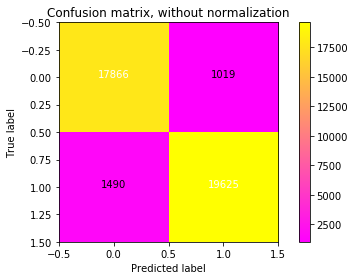

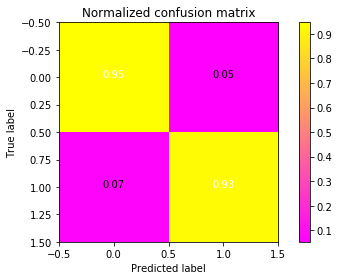

In [20]:
predict = list(clf.predict(y[:40000,:]))
truth = list(label.loc[:40000])
y_pred = np.array(predict)
y_test = np.array(truth)
#class_names = y_test_names

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.spring):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show();

## Logistics regression ROC

Text(0.5,1,'Receiver operating characteristic example')

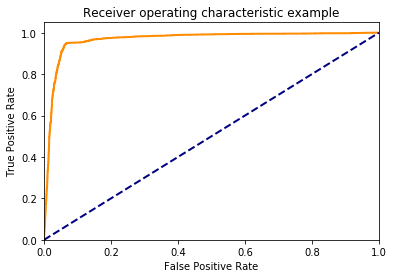

In [21]:
from sklearn.metrics import roc_curve
clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0]
fpr, tpr, thresholds = roc_curve(label.loc[40001:50000],clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0])
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',lw=lw, )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(y[:40000,:], label.loc[:40000])
gnb.score(y[40000:50000,:],label.loc[40001:50000])

0.9306

## Naive Bayes confusion matrix

Confusion matrix, without normalization
[[17704  1181]
 [ 1769 19346]]
Normalized confusion matrix
[[0.94 0.06]
 [0.08 0.92]]


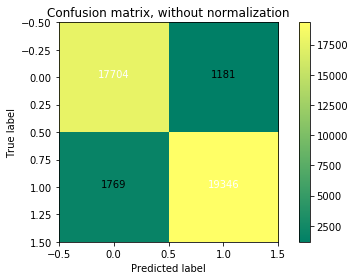

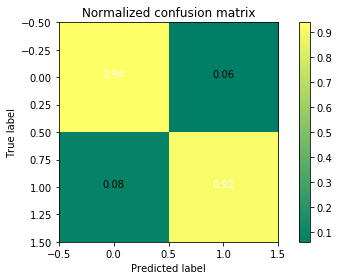

In [23]:
predict = list(gnb.predict(y[:40000,:]))
truth = list(label.loc[:40000])
y_pred = np.array(predict)
y_test = np.array(truth)

def plot_confusion_matrix(cm,normalize=False, title='Confusion matrix', cmap=plt.cm.summer):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show();

## Naive Bayes ROC

Text(0.5,1,'Receiver operating characteristic example')

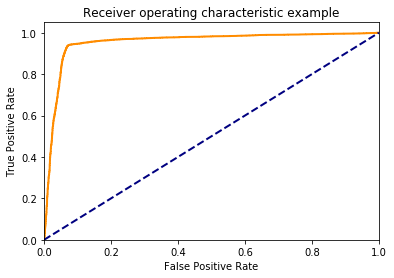

In [24]:
from sklearn.metrics import roc_curve
gnb.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0]
fpr, tpr, thresholds = roc_curve(label.loc[40001:50000],gnb.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0])
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',lw=lw, )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

# Support Vector Machine

In [25]:
from sklearn import svm
clf = svm.SVC(random_state=0, kernel='rbf').fit(y[:40000,:], label.loc[:40000])
clf.score(y[40000:50000,:],label.loc[40001:50000])

0.9387

## Support Vector Machine confusion matrix

Confusion matrix, without normalization
[[17999   886]
 [ 1399 19716]]
Normalized confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


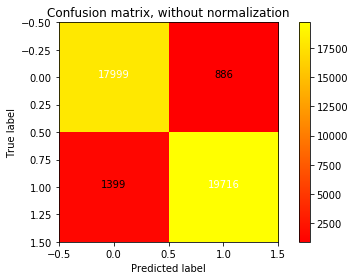

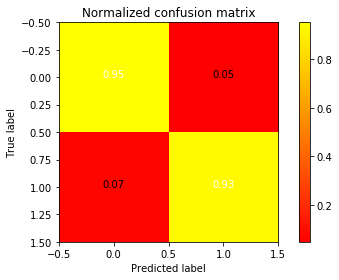

In [25]:
predict = list(clf.predict(y[:40000,:]))
truth = list(label.loc[:40000])
y_pred = np.array(predict)
y_test = np.array(truth)

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.autumn):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show();

## Support Vector Machine ROC

In [26]:
from sklearn.metrics import roc_curve
clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0]
fpr, tpr, thresholds = roc_curve(label.loc[40001:50000],clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0])
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',lw=lw, )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

AttributeError: predict_proba is not available when  probability=False

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=30).fit(y[:40000,:], label.loc[:40000])
clf.score(y[40000:50000,:],label.loc[40001:50000])

0.9483

## Random Forest confusion matrix

Confusion matrix, without normalization
[[17999   886]
 [ 1399 19716]]
Normalized confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


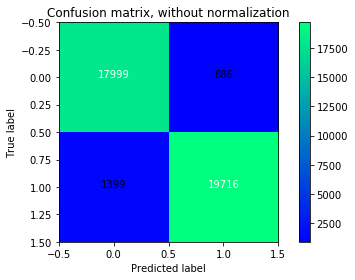

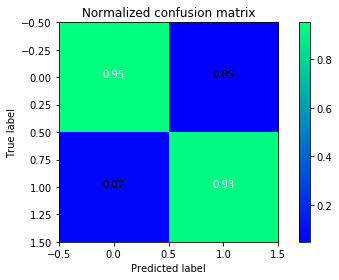

In [27]:
predict = list(clf.predict(y[:40000,:]))
truth = list(label.loc[:40000])
y_pred = np.array(predict)
y_test = np.array(truth)

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show();

## Random Forest ROC

Text(0.5,1,'Receiver operating characteristic example')

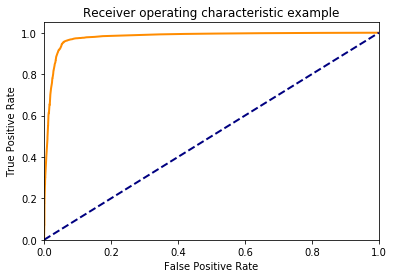

In [83]:
from sklearn.metrics import roc_curve
clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0]
fpr, tpr, thresholds = roc_curve(label.loc[40001:50000],clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0])
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',lw=lw, )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

# Adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=0, n_estimators=100).fit(y[:40000,:], label.loc[:40000])
clf.score(y[40000:50000,:],label.loc[40001:50000])

0.9425

## Adaboost confusion matrix

Confusion matrix, without normalization
[[17935   950]
 [ 1433 19682]]
Normalized confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


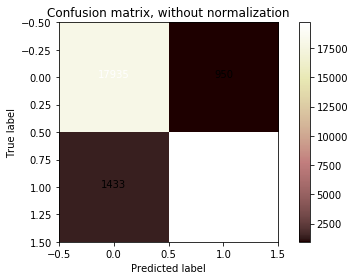

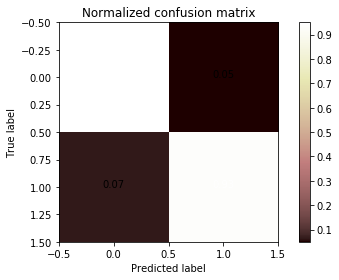

In [29]:
predict = list(clf.predict(y[:40000,:]))
truth = list(label.loc[:40000])
y_pred = np.array(predict)
y_test = np.array(truth)

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.pink):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True, title='Normalized confusion matrix')

plt.show();

## Adaboost ROC

Text(0.5,1,'Receiver operating characteristic example')

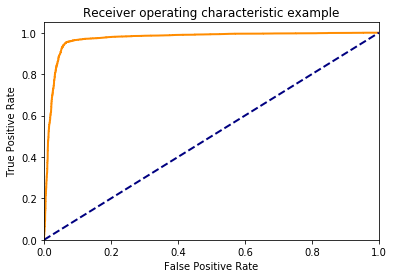

In [86]:
from sklearn.metrics import roc_curve
clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0]
fpr, tpr, thresholds = roc_curve(label.loc[40001:50000],clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0])
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',lw=lw, )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

# Multi-layer Perceptron

In [30]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=0, solver='sgd', activation='relu', hidden_layer_sizes=(10, 2)).fit(y[:40000,:], label.loc[:40000])
clf.score(y[40000:50000,:],label.loc[40001:50000])

0.9389

## Multi-layer Perceptron confusion matrix

Confusion matrix, without normalization
[[17910   975]
 [ 1622 19493]]
Normalized confusion matrix
[[0.95 0.05]
 [0.08 0.92]]


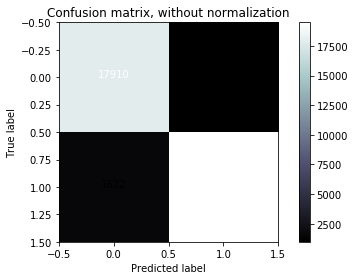

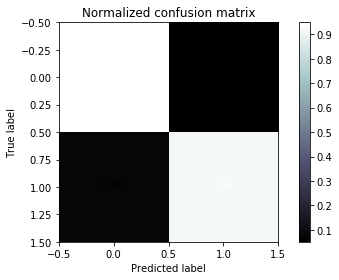

In [31]:
predict = list(clf.predict(y[:40000,:]))
truth = list(label.loc[:40000])
y_pred = np.array(predict)
y_test = np.array(truth)

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.bone):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show();

## Multi-layer Perceptron ROC

Text(0.5,1,'Receiver operating characteristic example')

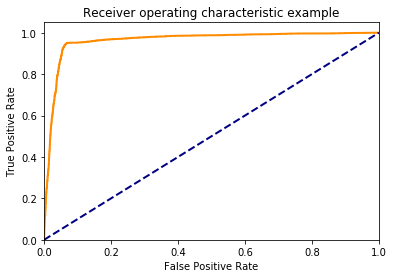

In [89]:
from sklearn.metrics import roc_curve
clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0]
fpr, tpr, thresholds = roc_curve(label.loc[40001:50000],clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0])
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',lw=lw, )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

# Gradient Boosting Tree

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0, n_estimators=100).fit(y[:40000,:], label.loc[:40000])
clf.score(y[40000:50000,:],label.loc[40001:50000])

0.9439

## Gradient Boosting Tree confusion matrix

Confusion matrix, without normalization
[[18008   877]
 [ 1398 19717]]
Normalized confusion matrix
[[0.95 0.05]
 [0.07 0.93]]


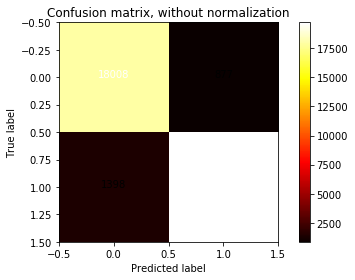

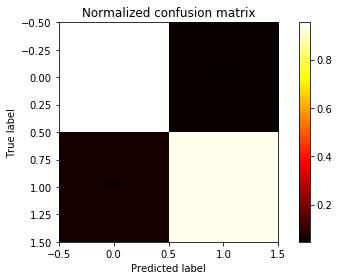

In [33]:
predict = list(clf.predict(y[:40000,:]))
truth = list(label.loc[:40000])
y_pred = np.array(predict)
y_test = np.array(truth)

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.hot):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,  title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show();

## Gradient Boosting Tree ROC

Text(0.5,1,'Receiver operating characteristic example')

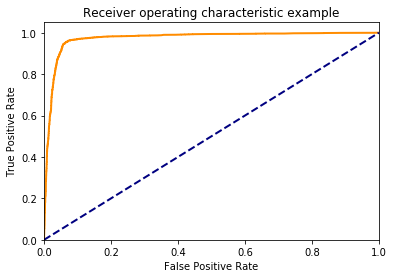

In [92]:
from sklearn.metrics import roc_curve
clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0]
fpr, tpr, thresholds = roc_curve(label.loc[40001:50000],clf.fit(y[:40000,:], label.loc[:40000]).predict_proba(y[40000:50000,:])[:,0])
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(tpr, fpr, color='darkorange',lw=lw, )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')